<a href="https://colab.research.google.com/github/prikshit-2000/Machine-Learning-Assignments/blob/main/Face_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Conv2D,Flatten,Dense,Dropout,Input,MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
import pandas as pd
from zipfile import ZipFile

import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [98]:
data = np.load('/content/drive/MyDrive/Vision Datasets/ORL_faces.npz')
data

In [99]:
X_train = data['trainX']
X_test = data['testX']

x_train = np.array(X_train,dtype = 'float32')/255.0
x_test = np.array(X_test,dtype = 'float32')/255.0



y_train = data['trainY']
y_test = data['testY']


In [100]:
X_train.shape , y_train.shape

((240, 10304), (240,))

In [101]:
x_test.shape,y_test.shape

((160, 10304), (160,))

In [102]:
y_train

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14,
       14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 18

In [103]:
def plot_image(arr):
    plt.imshow(arr.reshape((112,92)),cmap = 'gray')
    plt.show()

In [104]:
x_train[0,:].shape

(10304,)

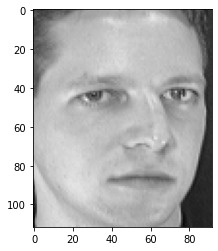

Label is  0


In [105]:
plot_image(x_train[1,:])
print("Label is ",y_train[1])

In [106]:
x_train,x_valid,y_train,y_valid = train_test_split(x_train,y_train, test_size = .1,random_state = 42)

In [107]:
im_rows = 112
im_cols = 92
im_shape = (im_rows,im_cols,1)
x_train  = x_train.reshape(x_train.shape[0],*im_shape)
x_valid  = x_valid.reshape(x_valid.shape[0],*im_shape)
x_test = x_test.reshape(x_test.shape[0],*im_shape)
print(x_train.shape , x_test.shape , x_valid.shape)

(216, 112, 92, 1) (160, 112, 92, 1) (24, 112, 92, 1)


In [108]:
y_train.shape,y_valid.shape,y_test.shape

((216,), (24,), (160,))

In [109]:
batch_size = 512
train_dataset = tf.data.Dataset.from_tensor_slices((x_train,y_train)).batch(512).shuffle(1024).prefetch(tf.data.AUTOTUNE)
test_dataset = tf.data.Dataset.from_tensor_slices((x_test,y_test)).batch(512).shuffle(1024).prefetch(tf.data.AUTOTUNE)
valid_dataset = tf.data.Dataset.from_tensor_slices((x_valid,y_valid)).batch(512).shuffle(1024).prefetch(tf.data.AUTOTUNE)

In [110]:
def face_model():

    inputs = Input(shape = im_shape)

    x = Conv2D(filters = 36 , kernel_size = 7 , activation = 'relu' )(inputs)
    x = MaxPooling2D(pool_size = 2)(x)
    x = Conv2D(filters = 54 , kernel_size = 5 , activation = 'relu' )(x)
    x = MaxPooling2D(pool_size = 2)(x)

    x = Flatten()(x)

    x = Dense(2028,activation = 'relu')(x)
    x = Dropout(0.5)(x)

    x = Dense(1024,activation = 'relu')(x)
    x = Dropout(0.5)(x)

    x = Dense(512,activation = 'relu')(x)
    x = Dropout(0.5)(x)

    outputs = Dense(20,activation = 'softmax')(x)

    model = Model(inputs = inputs , outputs = outputs)
    return model





In [111]:
model = face_model()
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 112, 92, 1)]      0         
                                                                 
 conv2d_9 (Conv2D)           (None, 106, 86, 36)       1800      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 53, 43, 36)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 49, 39, 54)        48654     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 24, 19, 54)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 24624)             0   

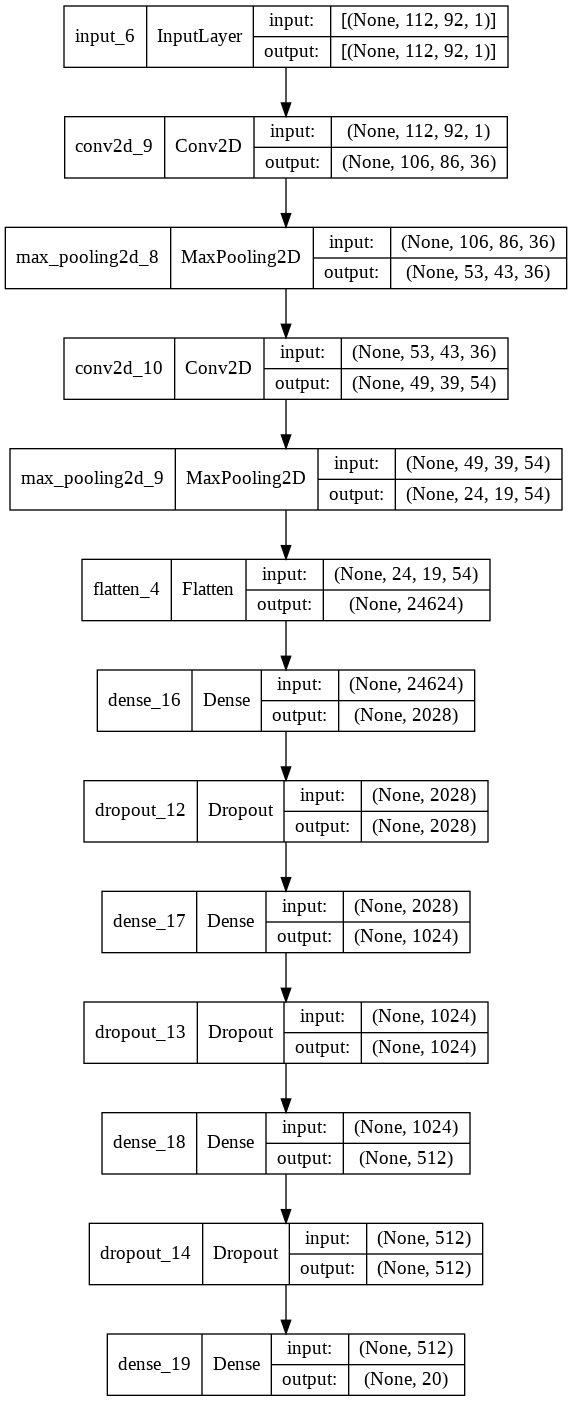

In [112]:
plot_model(model,show_shapes = True)

In [113]:
model.compile(loss = "sparse_categorical_crossentropy" , optimizer = 'adam',metrics = ['accuracy'])

In [114]:
history  = model.fit(train_dataset,validation_data = valid_dataset,epochs = 250)

Epoch 1/250
1/1 [==============================] - 1s 1s/step - loss: 3.0136 - accuracy: 0.0463 - val_loss: 3.2549 - val_accuracy: 0.0417
Epoch 2/250
1/1 [==============================] - 0s 239ms/step - loss: 3.7691 - accuracy: 0.0556 - val_loss: 3.1003 - val_accuracy: 0.0833
Epoch 3/250
1/1 [==============================] - 0s 217ms/step - loss: 3.1992 - accuracy: 0.0833 - val_loss: 3.0063 - val_accuracy: 0.0000e+00
Epoch 4/250
1/1 [==============================] - 0s 200ms/step - loss: 3.0328 - accuracy: 0.0417 - val_loss: 2.9900 - val_accuracy: 0.0417
Epoch 5/250
1/1 [==============================] - 0s 195ms/step - loss: 3.0026 - accuracy: 0.0556 - val_loss: 2.9946 - val_accuracy: 0.0833
Epoch 6/250
1/1 [==============================] - 0s 194ms/step - loss: 2.9884 - accuracy: 0.0741 - val_loss: 2.9985 - val_accuracy: 0.0417
Epoch 7/250
1/1 [==============================] - 0s 196ms/step - loss: 3.0093 - accuracy: 0.0417 - val_loss: 2.9990 - val_accuracy: 0.0000e+00
Epoch 8/

In [115]:
model.evaluate(test_dataset)

1/1 [==============================] - 0s 104ms/step - loss: 0.4946 - accuracy: 0.9500


[0.49461254477500916, 0.949999988079071]

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


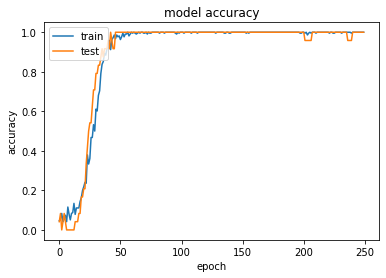

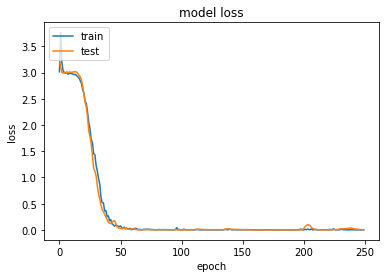

In [118]:
print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

accuracy : 
0.95
Confusion matrix, without normalization
[[8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 4 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 6 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0]
 [0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 6 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8]]
Confusion matrix, without normalization


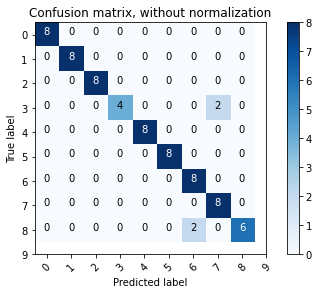

Confusion matrix, without normalization


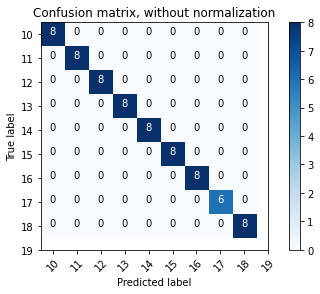

Confusion matrix:
[[8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 4 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 6 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0]
 [0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 6 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1

In [134]:
import itertools
from sklearn.metrics import accuracy_score,classification_report
from keras.utils import np_utils
predicted =np.array(model.predict(x_test))



ynew = model.predict(x_test)
ynew = (np.argmax(ynew,axis = 1))

Acc=accuracy_score(y_test, ynew)
print("accuracy : ")
print(Acc)

cnf_matrix=confusion_matrix(np.array(y_test), ynew)

y_test1 = np_utils.to_categorical(y_test, 20)



def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


print('Confusion matrix, without normalization')
print(cnf_matrix)

plt.figure()
plot_confusion_matrix(cnf_matrix[1:10,1:10], classes=[0,1,2,3,4,5,6,7,8,9],
                      title='Confusion matrix, without normalization')

plt.figure()
plot_confusion_matrix(cnf_matrix[11:20,11:20], classes=[10,11,12,13,14,15,16,17,18,19],
                      title='Confusion matrix, without normalization')

print("Confusion matrix:\n%s" % confusion_matrix(np.array(y_test), ynew))
print(classification_report(np.array(y_test), ynew))